# **Damage Detection Model**

In [1]:

import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

def Load_Data(TRAIN_DIR,TEST_DIR,CATEGORIES):

    file_list = []
    class_list = []

    
    # The size of the images that your neural network will use
    IMG_SIZE = 200

    # Checking or all images in the data folder
    for category in CATEGORIES :
        path = os.path.join(TRAIN_DIR, category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

    training_data = []

    def create_training_data():
        for category in CATEGORIES :
            path = os.path.join(TRAIN_DIR, category)
            class_num = CATEGORIES.index(category)
            for img in os.listdir(path):
                try :
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    training_data.append([new_array, class_num])
                except Exception as e:
                    pass

    create_training_data()

    random.shuffle(training_data)

    X = [] #features
    y = [] #labels

    for features, label in training_data:
        X.append(features)
        y.append(label)

    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

    # Creating the files containing all the information about your model
    pickle_out = open("X.pickle", "wb")
    pickle.dump(X, pickle_out)
    pickle_out.close()

    pickle_out = open("y.pickle", "wb")
    pickle.dump(y, pickle_out)
    pickle_out.close()

    pickle_in = open("X.pickle", "rb")
    X = pickle.load(pickle_in)
    return TRAIN_DIR,TEST_DIR,CATEGORIES


In [2]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

def Transfer_learning(CLASSES): 

    #CLASSES = 3

    # setup model
    base_model = InceptionV3(weights='imagenet', include_top=False)

    x = base_model.output
    x = GlobalAveragePooling2D(name='avg_pool')(x)
    x = Dropout(0.4)(x)
    predictions = Dense(CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # transfer learning
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer='Adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [3]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 200
HEIGHT = 200
BATCH_SIZE = 12

def Data_Augmenter():
# data prep
    train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

    validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

    train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
    validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')
    return train_generator,validation_generator




In [4]:
def Display_Augmented_Data():
    x_batch, y_batch = next(train_generator)

    plt.figure(figsize=(12, 9))
    for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
        plt.subplot(4, 8, k+1)
        plt.imshow((img + 1) / 2)
        plt.axis('off')



In [5]:
TRAIN_DIR,TEST_DIR,CATEGORIES=Load_Data(r"C:\Users\Usama Mehmood\Desktop\DDA\Damage\train",r"C:\Users\Usama Mehmood\Desktop\DDA\Damage\test",["bumper","head light","window"])
model=Transfer_learning(3)


Found 640 images belonging to 3 classes.
Found 181 images belonging to 3 classes.


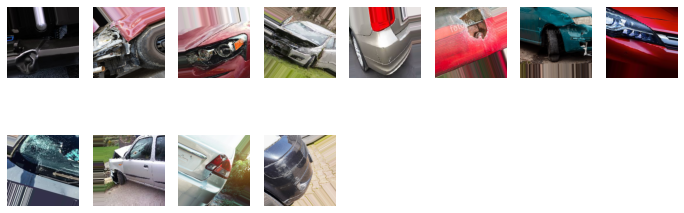

In [6]:
train_generator,validation_generator=Data_Augmenter()
Display_Augmented_Data()

In [7]:
EPOCHS = 20
BATCH_SIZE = 12
STEPS_PER_EPOCH = 10
VALIDATION_STEPS = 10

MODEL_FILE = 'filename.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

C:\Users\Usama Mehmood\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
10/10 [==============================] - 37s 3s/step - loss: 1.8125 - accuracy: 0.2996 - val_loss: 1.6933 - val_accuracy: 0.2417
Epoch 2/20
10/10 [==============================] - 25s 3s/step - loss: 1.4761 - accuracy: 0.3639 - val_loss: 1.1025 - val_accuracy: 0.4833
Epoch 3/20
10/10 [==============================] - 26s 3s/step - loss: 1.2874 - accuracy: 0.5198 - val_loss: 1.2609 - val_accuracy: 0.4583
Epoch 4/20
10/10 [==============================] - 25s 3s/step - loss: 1.3335 - accuracy: 0.4656 - val_loss: 0.9839 - val_accuracy: 0.5750
Epoch 5/20
10/10 [==============================] - 28s 3s/step - loss: 0.9966 - accuracy: 0.6115 - val_loss: 0.8551 - val_accuracy: 0.6417
Epoch 6/20
10/10 [==============================] - 25s 3s/step - loss: 0.9895 - accuracy: 0.5829 - val_loss: 0.8497 - val_accuracy: 0.6500
Epoch 7/20
10/10 [==============================] - 25s 3s/step - loss: 1.2479 - accuracy: 0.5159 - val_loss: 1.0805 - val_accuracy: 0.5417
Epoch 8/20
10/10 [==

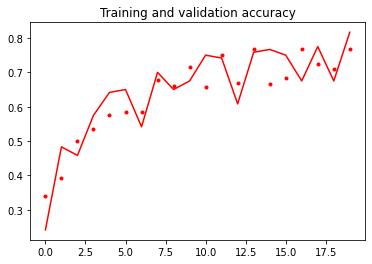

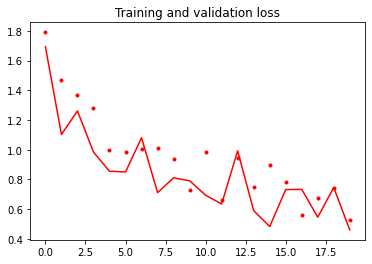

In [8]:
def plot_training(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from keras.preprocessing import image
from keras.models import load_model


def predict(model, img):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]


def plot_preds(img, preds):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
        preds: list of predicted labels and their probabilities
    """
    labels = ("bumper","head lamp","window")
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1], preds, alpha=0.5)
    plt.yticks([0, 1], labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()

In [10]:
model = load_model(MODEL_FILE)

Damaged Part of your car is : Head Lamp


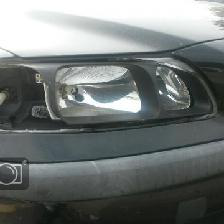

In [11]:
import PIL.Image as Image
from IPython.display import display
img = image.load_img(r'C:\Users\Usama Mehmood\Desktop\DDA\Damage\test\head light\1022.jpeg', target_size=(HEIGHT, WIDTH))
preds = predict(model, img)

if (max(preds)==preds[0]):
    part="Bumper"
elif(max(preds)==preds[1]):
    part="Head Lamp"
else:
    part="Windscreen"
print ("Damaged Part of your car is : "+ part)
display(Image.open(r"C:\Users\Usama Mehmood\Desktop\DDA\Damage\test\head light\1022.jpeg"))


Damaged Part of your car is : Windscreen


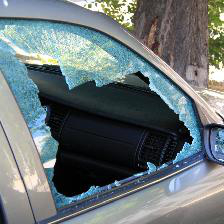

In [12]:
import PIL.Image as Image
from IPython.display import display
img = image.load_img(r'C:/Users/Usama Mehmood/Desktop/DDA/image2529.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(model, img)

if (max(preds)==preds[0]):
    part="Bumper"
elif(max(preds)==preds[1]):
    part="Head Lamp"
else:
    part="Windscreen"
print ("Damaged Part of your car is : "+ part)
display(Image.open(r"C:/Users/Usama Mehmood/Desktop/DDA/image2529.jpg"))


In [13]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
import socket
import time
import random
from _thread import *
import threading
import json
from io import StringIO
import cv2
import tensorflow as tf
import PIL.Image as Image

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from IPython.display import display

def threaded(c):
    
    #creating a filename having some random in it.
    xrn=random.randint(0,5000)
    fileName = 'image'
    fileName += str(xrn)
    fileName += '.jpg'
    
    
    #print("Hello World")
    #print(fileName)
    
    data = bytes(1)
    
    #to store recieved file in local directory
    with open(fileName, 'wb') as file:
        while data:
            try:
                data = c.recv(1024)
            except Exception as e:
                break;
            #print(type(data))
            if not data:
                #print("Hello World!!!!!!!!!!!")
                break
            file.write(data)
    
    #I want to sent JSON response that Image is recieved.
        #print("Hello World!!")        
        #print( "Sending JSON" , json.dumps({"label": "Image Received" }) )
        #c.send( json.dumps({"label": "Image Received" }).encode('utf-8') )
        c.close()
        
        time.sleep(30)
        #here get the retrieved image
        
        fildata = r"C:/Users/Usama Mehmood/Desktop/DDA/"+fileName #your image path
        #print(fildata)
        
        img = image.load_img(fildata, target_size=(HEIGHT, WIDTH))
        preds = predict(model, img)
        
        partRes = ""

        if (max(preds)==preds[0]):
            partRes="Bumper"
        elif(max(preds)==preds[1]):
            partRes="Head Lamp"
        else:
            partRes="Windscreen"
        print ("Damaged Part of your car is : "+ partRes)

        
        
        HOST = '192.168.0.60'  # The server's hostname or IP address
        PORT = 5009        # The port used by the server

        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
            s.connect((HOST, PORT))
            s.send(partRes.encode('utf-8'))
            #data = s.recv(1024)

        #print('Received', repr(data))
    
port = 5008
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.bind(( "0.0.0.0" , port ))
print("socket binded to port", port )
s.listen(5)
print("socket is listening")
all_conn = []

while True:
    conn, addr = s.accept()
    print('Connected to :', addr[0], ':', addr[1])
    all_conn.append( conn )
    start_new_thread(threaded, (conn,))
s.close()

socket binded to port 5008
socket is listening
Connected to : 192.168.0.60 : 45394
Damaged Part of your car is : Windscreen
Connected to : 192.168.0.60 : 45552
Damaged Part of your car is : Head Lamp
Connected to : 192.168.0.60 : 45824
Damaged Part of your car is : Windscreen
Connected to : 192.168.0.60 : 45858
Damaged Part of your car is : Head Lamp
Connected to : 192.168.0.60 : 45868
Damaged Part of your car is : Head Lamp
